# Introduction to Data Science 
# Lecture 19: Clustering 2 - Exercise Solutions
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Example: MNIST dataset

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


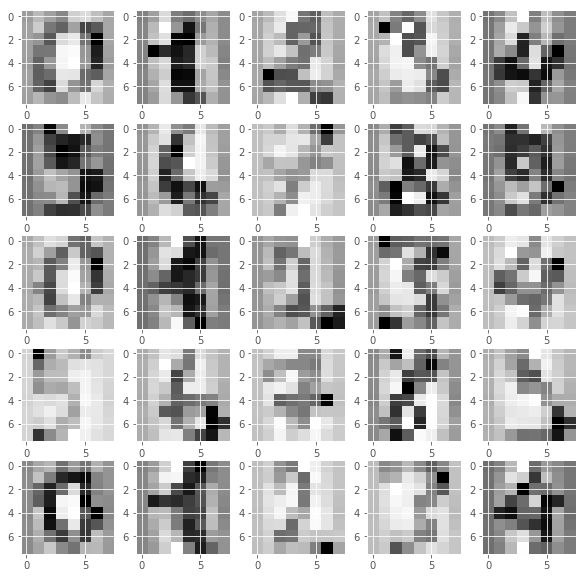

In [3]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
We first use k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

In [4]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.5981164024963086

#### Exercise: Hierarchical clustering
Use a hierarchical clustering method to cluster the dataset. Again compute the homogeneity. 

*Hint:* Use the scikit-learn function *AgglomerativeClustering*.  

In [5]:
# your code here

# reference solution 
# fit Agglomerative Clustering to data
ac_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=10)
ac_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y,labels_pred=ac_model.labels_)

0.7584914070326005

#### Exercise: DBScan

Use DBScan to cluster the dataset. A problem you will face is choosing $\epsilon$. You can use the DistanceMetric function to get a sense of typical distances between points.  

In [27]:
import pandas as pd
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances 
df = pd.DataFrame(distances)
#df.describe()
print(ac_model.labels_[:10])

series = pd.Series(ac_model.labels_)
series[series==1]

df.insert(0, "labels", series)
df = df.sort_values("labels")

df = df.append(series, "rowl")
df.head()




[5 1 1 4 8 4 6 9 1 4]


,labels,0,1,2,3,4,5,6,7,8,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.0,10.389499,9.554871,11.868373,10.636914,12.242474,11.751034,9.903304,8.899783,10.682471,...,9.093940,12.524624,10.014023,10.132375,11.449353,10.978957,10.150847,10.158619,10.471155,11.458859
1,0.0,8.669225,9.083621,11.045104,8.751493,10.447801,10.138982,8.291893,10.964178,9.205087,...,8.099371,11.430756,10.052127,9.438376,10.489894,9.445010,8.887760,9.316979,8.821109,10.454788
2,0.0,12.332109,12.241900,12.975589,11.676605,13.996647,13.200494,11.811316,11.022962,12.117401,...,11.805776,14.869167,11.310356,11.693932,14.512233,12.571259,12.556948,12.071083,12.980667,11.764738
3,0.0,11.213056,11.484104,12.476066,10.849225,13.083284,12.663112,10.931865,10.823836,11.690578,...,10.629032,14.148729,11.206643,11.323289,13.715511,11.496959,11.574665,11.590375,11.870014,11.630030
4,0.0,6.880170,9.444559,10.811064,7.809656,10.113047,6.749805,9.073514,9.546424,8.226303,...,5.794793,10.767926,9.636941,9.006570,10.857094,6.164717,8.095466,9.289016,6.898542,9.050161


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,9.429465,9.602031,10.347161,9.320771,10.483066,9.764437,9.368594,11.206563,9.250916,9.740384,...,9.167075,11.201947,10.214618,9.209303,11.025827,9.097838,9.804845,9.335236,9.227846,10.106628
std,3.025238,2.879556,2.702908,2.941581,2.783363,2.856713,2.930177,2.670607,2.803061,2.750411,...,2.871609,2.926652,2.738580,2.840153,2.961698,3.006655,3.004637,2.836908,2.856528,2.718451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.377907,8.445101,9.152263,8.055664,9.289648,8.457454,8.032772,10.200947,8.068446,8.527683,...,7.835470,9.791565,9.138989,7.983034,9.657150,7.529115,8.649545,8.123597,7.896166,8.822764
50%,9.269402,9.473299,10.103218,9.089083,10.210529,9.448140,9.221662,11.112941,8.837322,9.337980,...,8.838463,11.135542,9.998645,9.003926,10.920055,8.876145,9.649613,9.085757,8.921825,9.756183
75%,10.304851,10.380412,11.030820,10.050466,11.209419,10.524195,10.263819,11.886140,9.889272,10.310384,...,9.862368,12.239369,10.847290,9.905428,12.187147,10.014563,10.723950,9.988732,9.854564,10.768096
max,48.238333,48.917352,48.383393,48.996929,48.145768,49.016219,48.563717,49.503611,48.818798,49.260349,...,48.779013,47.919713,48.952603,48.931808,48.199944,48.782511,48.277673,48.703832,48.816560,48.174417


In [32]:
dbscan_model = DBSCAN(eps=4.2, min_samples=2)

dbscan_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y,labels_pred=dbscan_model.labels_)

0.6586707476852938

## MNIST: Other clustering methods
Take a look at the clustering methods and options for various methods on the [scikit-learn page](http://scikit-learn.org/stable/modules/clustering.html). 

**Exercise:** By modifying the following code, try to find the clustering method with the largest homogeneity score for this dataset. 

In [33]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

# your code here

# Reference solution 

method = DBSCAN(eps=4.1, min_samples=5)
compare_method(estimator=method, name="dbscan", data=X)

method = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=10)
compare_method(estimator=method,name="best hierarchical meth", data=X) 

method = SpectralClustering(n_clusters=10,affinity='nearest_neighbors')
compare_method(estimator=method,name="spectral clustering", data=X) 




__________________________________________________
   method                   time      homo
                k-means++   0.18s     0.601 
           k-means random   0.15s     0.678 
                   dbscan   0.36s     0.588 
   best hierarchical meth   0.17s     0.758 
      spectral clustering   0.41s     0.805 
